# Siggi Example

### Import necessary code from repo

In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import BandpassDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Set up filter object and get example spectra

In [3]:
f = filters()
s = spectra()
red_spec = s.get_red_spectrum()
blue_spec = s.get_blue_spectrum()

### Define redshift prior

In [4]:
def prior_z(z, z0=0.5):
    return (z**2.)*np.exp(-(z/z0)**1.5)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**1.5)))

In [5]:
# Shows the total entropy for 2 SEDs with equal weighting
entropy = -1. * .5 * np.sum(prior_z(np.arange(0.05, 2.51, .05)) * np.log2(.5 * prior_z(np.arange(0.05, 2.51, .05))))
print(entropy*2.)

5.807147751224095


### Set up a siggi object with the SEDs, the SED weights, the prior, and the redshift binning defined.

In [6]:
sig_example = siggi([red_spec, blue_spec], [0.5, 0.5], prior_z,
                    z_min=0.05, z_max=2.5, z_steps=50)

### Can also include a set of filters that are static and not moved in the optimization

Here we use the LSST *ugrizy* filters

In [7]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../data/lsst_baseline_throughputs/')
# To make things more interesting we will just use the 'u' and 'g' filters.
frozen_dict = BandpassDict(frozen_dict.values()[:2], frozen_dict.keys()[:2])

### Run optimization

In [8]:
%%time
num_filters = 2
set_ratio = 1.0
res = sig_example.optimize_filters(num_filters=num_filters,
                                   filt_min=300., filt_max=1100.,
                                   sed_mags=22.0,
                                   set_ratio=None,#set_ratio,
                                   system_wavelen_max=1200.,
                                   n_opt_points=15,
                                   optimizer_verbosity=5,
                                   procs=2, acq_func_kwargs_dict={'kappa':3},
                                   frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                                   starting_points = None)

[(300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0)] [[300.0, 414.2857142857143, 528.5714285714286, 642.8571428571429, 757.1428571428571, 871.4285714285714, 985.7142857142858, 1100.0], [300.0, 357.14285714285717, 414.2857142857143, 471.42857142857144, 528.5714285714286, 585.7142857142858, 642.8571428571429, 700.0], [700.0, 757.1428571428571, 814.2857142857143, 871.4285714285714, 928.5714285714286, 985.7142857142858, 1042.857142857143, 1100.0], [315.25350488799984, 486.9167643626764, 552.9751636415866, 663.1256563003956, 667.1598759560395, 763.7681959120573, 980.9531442581381, 1010.1128681511408], [384.4090594017172, 533.6714155097975, 552.2091212822664, 558.9318040441078, 593.6744159036433, 755.2486560450442, 889.5227213261398, 1058.644448505262], [485.89287568186205, 690.7775348054743, 704.6873723986032, 764.781694216988, 855.0796916598148, 899.1701261149933, 1055.4330735117192, 1060.0804776768807], [3

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.2min finished


-4.83814158797469 10
[665.5704640620621, 971.4329779016018] [[497.68360844335734, 701.2365376655348, 711.3941464036975, 764.466217635155], [862.318746872571, 906.3643746843806, 1053.245467752094, 1063.8033222973618]]
[665.4142134913078, 971.2597946317469] [[497.2792521937435, 701.23310951944, 711.2559667616497, 764.469737039884], [862.3201515449213, 906.0031775484622, 1053.2449712031562, 1063.4708782304479]]
[497.2792521937435, 701.23310951944, 711.2559667616497, 764.469737039884, 862.3201515449213, 906.0031775484622, 1053.2449712031562, 1063.4708782304479] 4.820746916666648
[497.68360844335734, 701.2365376655348, 711.3941464036975, 764.466217635155, 862.318746872571, 906.3643746843806, 1053.245467752094, 1063.8033222973618] 4.820625570421699


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   14.0s finished


-4.83814158797469 12
[489.9988073047505, 853.5118280619031] [[320.74461502259487, 463.41844994862385, 543.5958598091441, 632.2363044386393], [708.2188106370343, 793.182074473386, 881.05832399745, 1031.5881031397419]]
[660.5680431079945, 971.3994652183943] [[489.6641038973328, 692.6758539381474, 706.9012058036164, 763.1871846408076], [863.497627671579, 904.9255423381708, 1053.5905573157916, 1063.5841335480359]]
[320.74461502259487, 463.41844994862385, 543.5958598091441, 632.2363044386393, 708.2188106370343, 793.182074473386, 881.05832399745, 1031.5881031397419] 4.472006320313133
[489.6641038973328, 692.6758539381474, 706.9012058036164, 763.1871846408076, 863.497627671579, 904.9255423381708, 1053.5905573157916, 1063.5841335480359] 4.829979480353792


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.2s finished


-4.83814158797469 14
[491.07447010319095, 861.6331066274148] [[319.6603448517266, 461.5627380234321, 544.7013667684317, 638.3734307691733], [668.3468423670546, 798.8379534927969, 953.9186172124863, 1025.4290134373214]]
[491.0744624525898, 861.6331908443461] [[319.6597401758324, 461.56275205564, 544.7016283370724, 638.3737292418143], [668.3460695642625, 798.8391616588523, 953.9173056272431, 1025.4302265270267]]
[319.6603448517266, 461.5627380234321, 544.7013667684317, 638.3734307691733, 668.3468423670546, 798.8379534927969, 953.9186172124863, 1025.4290134373214] 4.490250796387664
[319.6597401758324, 461.56275205564, 544.7016283370724, 638.3737292418143, 668.3460695642625, 798.8391616588523, 953.9173056272431, 1025.4302265270267] 4.490255477269969


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   15.1s finished


-4.83814158797469 16
CPU times: user 2min 46s, sys: 4.03 s, total: 2min 50s
Wall time: 4min 52s


### Find the best results

In [9]:
min_idx = np.argmin(res.yi)

In [10]:
best_pt = res.Xi[min_idx]

In [11]:
best_val = np.min(res.yi)

In [12]:
print(best_pt, best_val)

[485.89287568186205, 690.7775348054743, 704.6873723986032, 764.781694216988, 855.0796916598148, 899.1701261149933, 1055.4330735117192, 1060.0804776768807] -4.83814158797469


### Plot with Siggi's plotting code

In [13]:
red_spec.redshiftSED(0.5)
blue_spec.redshiftSED(0.5)
sig_plot = plotting([red_spec, blue_spec], best_pt,
                    frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                    sed_mags=22.0)

#### Let's first make a plot of the new filters along with the filters we've frozen in place. For reference we'll also include the SEDs at redshift z=0.5.

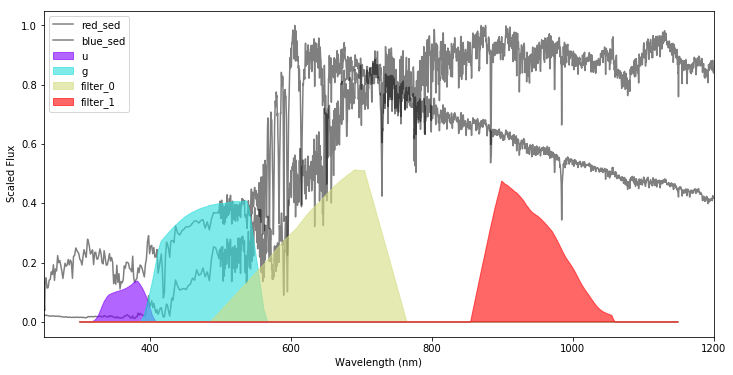

In [14]:
fig = sig_plot.plot_filters()
plt.legend(['red_sed', 'blue_sed'] + sig_plot.filter_dict.keys())

#### We can also look at a color-color plot of the new color values for each sed as it increases in redshift and the error bars on the colors

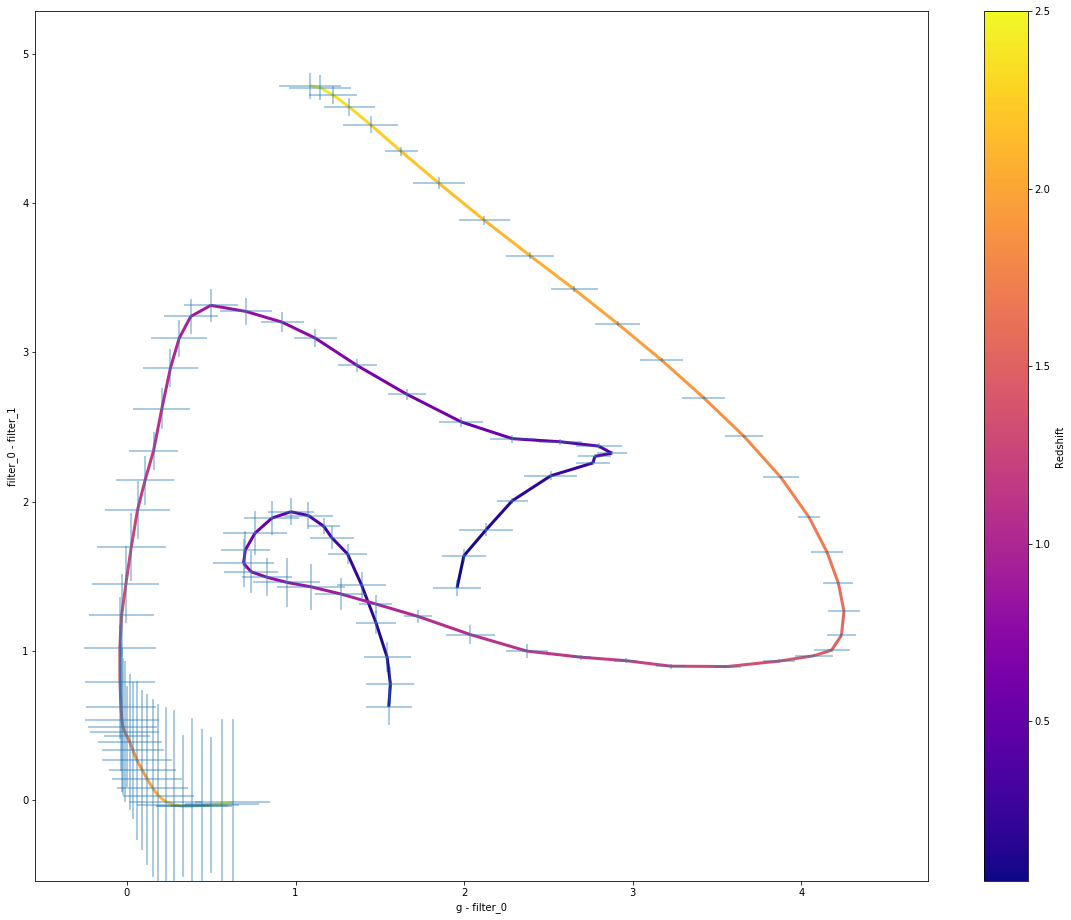

In [15]:
fig = plt.figure(figsize=(20,16))
fig = sig_plot.plot_color_color(['g', 'filter_0', 'filter_0', 'filter_1'],
                                np.linspace(0.05, 2.5, 50), fig=fig)